# **data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [208]:
data = np.array([[141, 16.8, 0],[154, 15.2, 0],[210, 11.4, 1],[185, 14.1, 1]])

In [ ]:
X = data[:,0:2]
Y = data[:,2]
x1 = X[:,0]
x2 = X[:,1]
print('x1 : ' , x1)
print('x2 : ' , x2)
print('y : ' , X)

In [39]:
x1 = (x1 - x1.min()) / (x1.max() - x1.min())
x2 = (x2 - x2.min()) / (x2.max() - x2.min())

In [40]:
print('x1 : ' , x1)
print('x2 : ' , x2)

x1 :  [0.         0.1884058  1.         0.63768116]
x2 :  [1.        0.7037037 0.        0.5      ]


In [47]:
X[:,0] = x1
X[:,1] = x2
print(X)

[[0.         1.        ]
 [0.1884058  0.7037037 ]
 [1.         0.        ]
 [0.63768116 0.5       ]]


In [73]:
def sigmoid(x, w, b):
    out = 1 / (1 + np.exp(-((w * x).sum() + b)))
    return out

# **GD**

In [48]:
def cross_entropy(x, y, w, b):
    Loss = 0.0
    for i in range(x.shape[0]):
        Loss += -(y[i] * np.log(sigmoid(x[i], w, b)))
    return Loss

In [119]:
def calc_gradient(x, y, w, b):
    sigmoidout = sigmoid(x, w, b)
    w_derivative =  (1 - sigmoidout) * -y * x
    b_derivative =  (1 - sigmoidout) * -y 
    return w_derivative, b_derivative

In [120]:
def gradient_descent(x, y , learning_rate ,epoch = 100):
    w = [0.1, 0.2]
    b = 0.0
    num = x.shape[0]
    Loss = []
    for i in range(epoch):
        # each epoch reset the gradient
        w_derivative, b_derivative = 0,0
        for j in range(num):
            #each sample reset the gradient 
            w_derivative, b_derivative = 0,0
            w_derivative, b_derivative = calc_gradient(x[j], y[j], w, b)
            w = w - learning_rate * w_derivative
            b = b - learning_rate * b_derivative
        #each epoch save loss to a list
        Loss.append(cross_entropy(x, y, w, b))
    return Loss

In [121]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

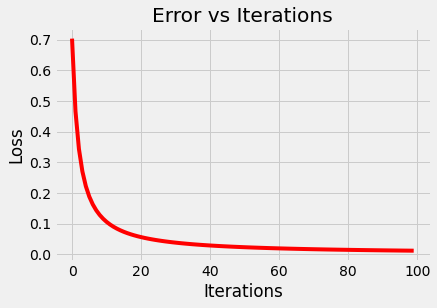

 final loss is  0.011796933069983155


In [122]:
loss = gradient_descent(X, Y, 0.5)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

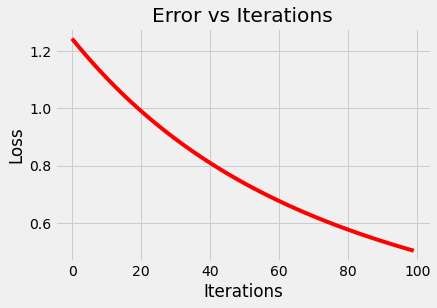

 final loss is  0.5034030323275833


In [123]:
loss = gradient_descent(X, Y, 0.01)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

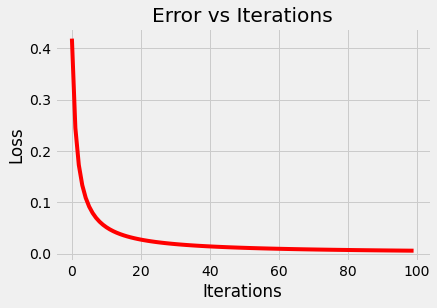

 final loss is  0.005857897142069461


In [124]:
loss = gradient_descent(X, Y, 1)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

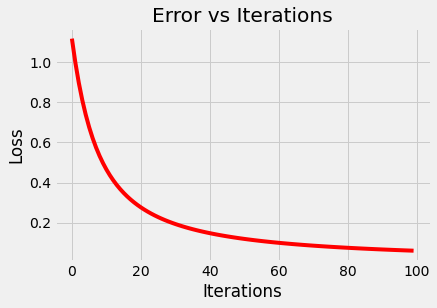

 final loss is  0.06071589230622601


In [125]:
loss = gradient_descent(X, Y,0.1)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

# **SGD**

In [126]:
def stochastic_gradient_descent(x,y,lr):
    w = [0.1, 0.2]
    b = 0.0
    Loss = []
    for i in range(100):
        w_derivative, b_derivative = 0,0
        for _ in range(1):
            #by random 
            shuf = np.random.randint(0,x.shape[0])
            w_derivative, b_derivative = calc_gradient(x[shuf], y[shuf], w, b)
            w = w - lr * w_derivative
            b = b - lr * b_derivative
            #each sample reset the gradient 
            w_derivative, b_derivative = 0,0
            #this time each data save loss to a list not each epoch
        Loss.append(cross_entropy(x, y, w, b))
    return Loss

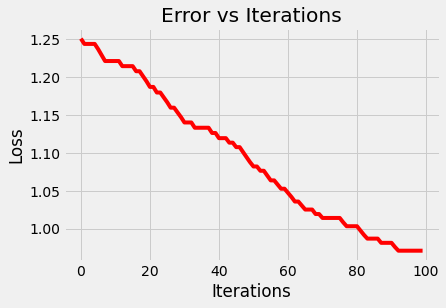

 final loss is  0.9710404256942651


In [127]:
loss = stochastic_gradient_descent(X, Y, 0.01)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

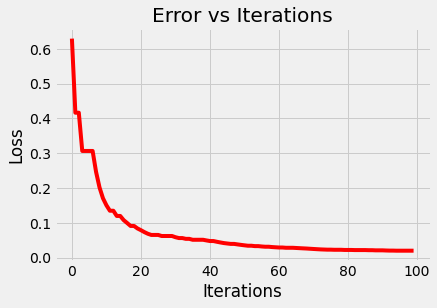

 final loss is  0.019985532053235167


In [128]:
loss = stochastic_gradient_descent(X, Y, 1)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

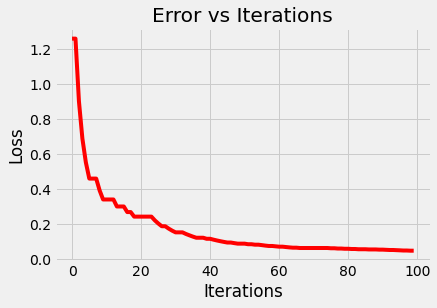

 final loss is  0.046804732430643085


In [131]:
loss = stochastic_gradient_descent(X, Y, 0.5)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

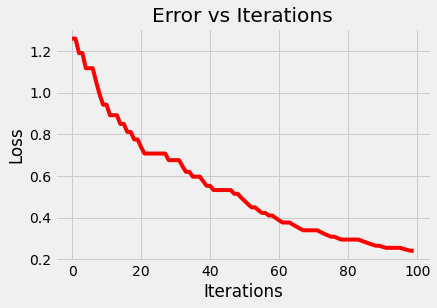

 final loss is  0.24075510444699583


In [132]:
loss = stochastic_gradient_descent(X, Y, 0.1)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

# **GD + Momentum**

In [133]:
def gradient_descent_momentum(x, y,lr, beta):
    w = [0.1, 0.2]
    b = 0.0
    Loss = []
    vw = 0.0
    vb = 0.0
    for i in range(100):
        # each epoch reset the gradient
        w_derivative, b_derivative = 0,0
        for j in range(x.shape[0]):
            w_derivative, b_derivative = calc_gradient(x[j], y[j], w, b)
            vw = beta * vw + w_derivative
            vb = beta * vb + b_derivative
            w = w - (lr * vw)
            b = b - (lr * vb)
            # after each sample reset the gradient
            w_derivative, b_derivative = 0,0
        #end of each epoch update loss
        Loss.append(cross_entropy(x, y, w, b))
    return Loss

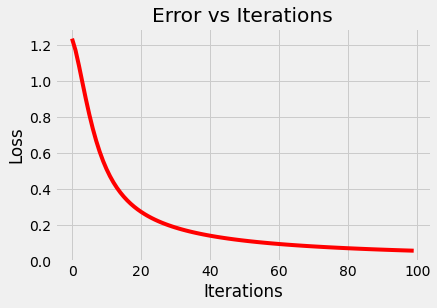

 final loss is  0.05846270565536449


In [144]:
loss = gradient_descent_momentum(X,Y,0.01,0.9)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

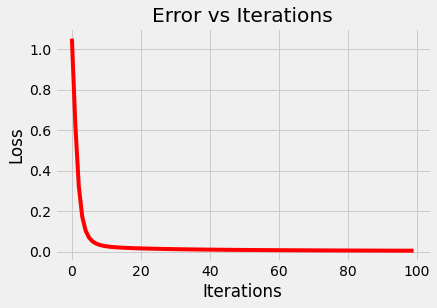

 final loss is  0.004993098022652793


In [143]:
loss = gradient_descent_momentum(X, Y, 0.1 ,0.9)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

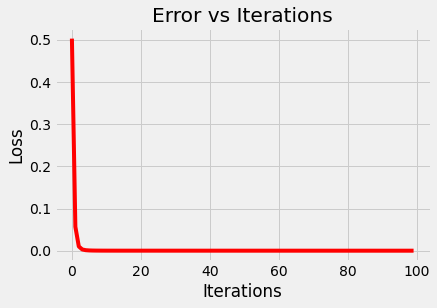

 final loss is  0.00026565851689097246


In [142]:
loss = gradient_descent_momentum(X, Y,0.5 , 0.9)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

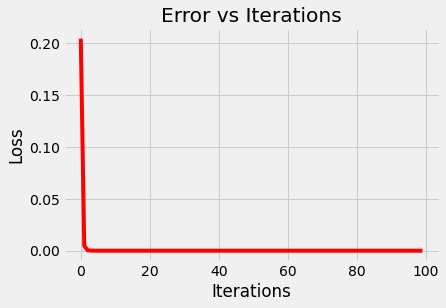

 final loss is  3.0207627181226415e-06


In [145]:
loss = gradient_descent_momentum(X,Y,1,0.9)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

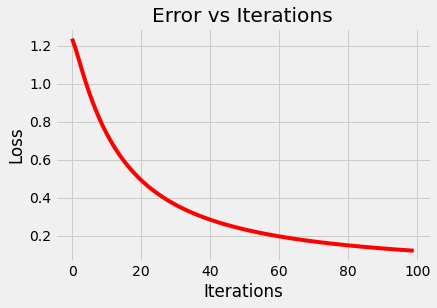

 final loss is  0.12158588744818252


In [150]:
loss = gradient_descent_momentum(X, Y,0.01,0.8)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

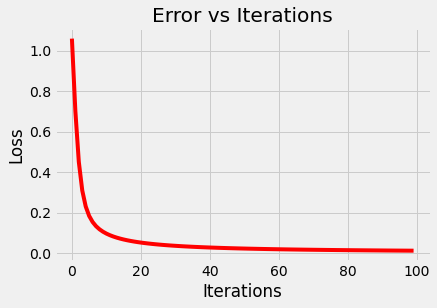

 final loss is  0.011418423185530272


In [151]:
loss = gradient_descent_momentum(X,Y,0.1,0.8)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

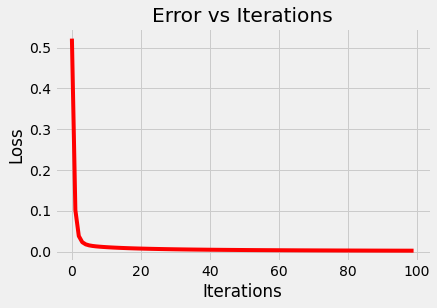

 final loss is  0.0020945572318599994


In [152]:
loss = gradient_descent_momentum(X, Y, 0.5 , 0.8)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

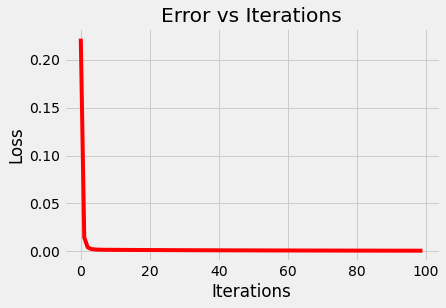

 final loss is  0.0007248517999098871


In [153]:
loss = gradient_descent_momentum(X, Y, 1 , 0.8)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

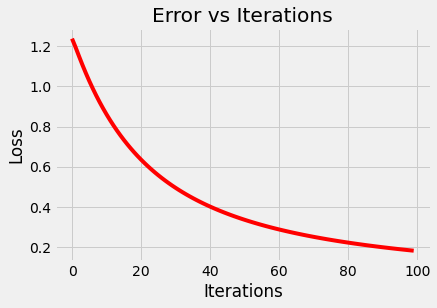

 final loss is  0.18206556147047773


In [154]:
loss = gradient_descent_momentum(X, Y,0.01,0.7)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

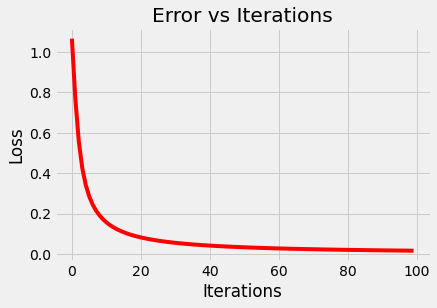

 final loss is  0.017569030163413275


In [155]:
loss = gradient_descent_momentum(X, Y,0.1,0.7)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

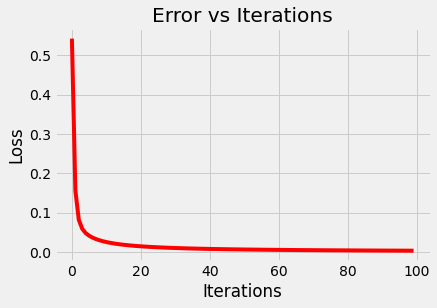

 final loss is  0.00339277054377681


In [156]:
loss = gradient_descent_momentum(X, Y,0.5,0.7)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

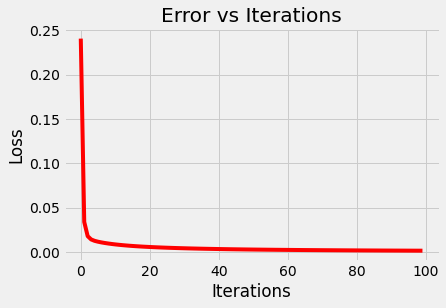

 final loss is  0.0016060167920221337


In [157]:
loss = gradient_descent_momentum(X, Y,1,0.7)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

# **SGD + Momentum**

In [158]:
def stochastic_gradient_descent_momentum(x, y,lr,beta):
    w = [0.1, 0.2]
    b = 0.0
    Loss = []
    vw = 0.0
    vb = 0.0
    
    for i in range(100):
        # reset gradient for each epoch
        w_derivative, b_derivative = 0,0
        
        for i in range(1):
            #shuffle        
            j = np.random.randint(0,x.shape[0])
            w_derivative, db = calc_gradient(x[j], y[j], w, b)
            vw = beta * vw + w_derivative
            vb = beta * vb + b_derivative
            w = w - (lr * vw)
            b = b - (lr * vb)

          #end of each bach update loss 
        Loss.append(cross_entropy(x, y, w, b))

    return Loss

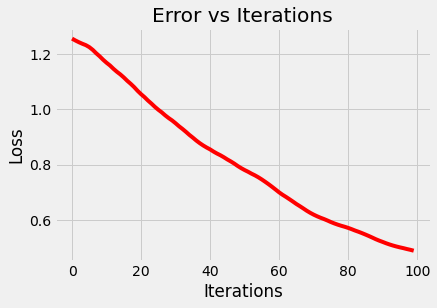

 final loss is  0.4887367414128868


In [159]:
loss = stochastic_gradient_descent_momentum(X, Y,0.01 , 0.9)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

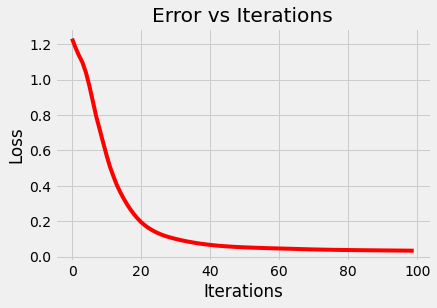

 final loss is  0.03362226614438875


In [168]:
loss = stochastic_gradient_descent_momentum(X, Y,0.1 , 0.9)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

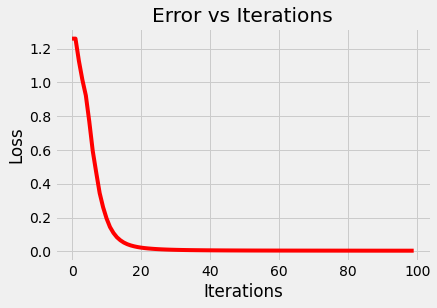

 final loss is  0.003974510003477651


In [161]:
loss = stochastic_gradient_descent_momentum(X, Y,0.5 , 0.9)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

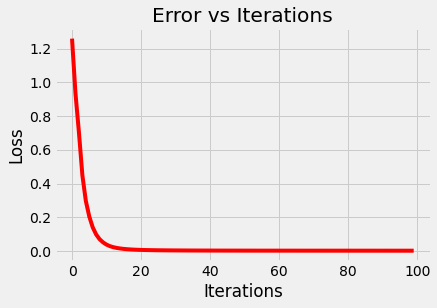

 final loss is  0.001837543549669048


In [162]:
loss = stochastic_gradient_descent_momentum(X, Y,1 , 0.9)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

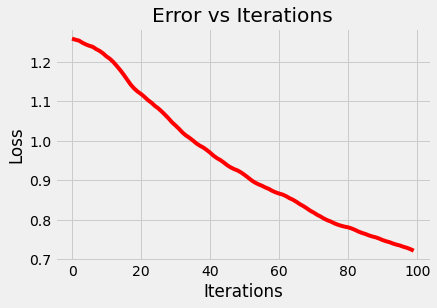

 final loss is  0.7219218349002083


In [163]:
loss = stochastic_gradient_descent_momentum(X, Y,0.01 , 0.8)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

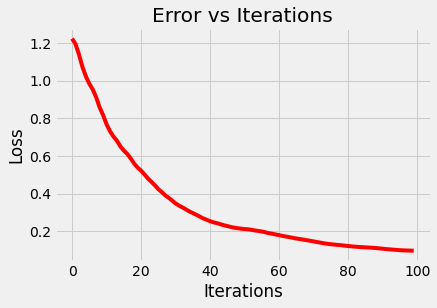

 final loss is  0.09770523409339762


In [164]:
loss = stochastic_gradient_descent_momentum(X, Y,0.1 , 0.8)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

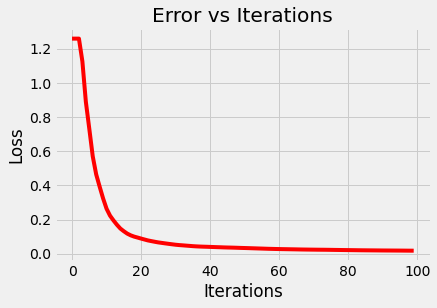

 final loss is  0.017828999162550218


In [165]:
loss = stochastic_gradient_descent_momentum(X, Y,0.5 , 0.8)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

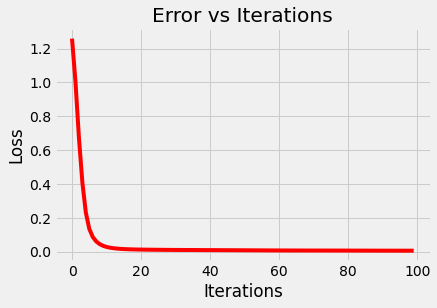

 final loss is  0.006505367291480798


In [166]:
loss = stochastic_gradient_descent_momentum(X, Y,1 , 0.8)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

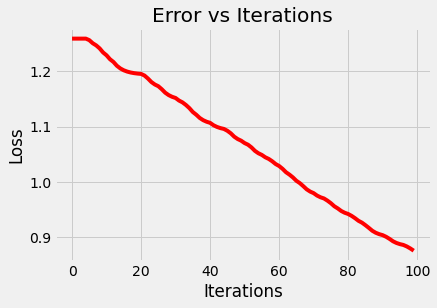

 final loss is  0.8756717402486378


In [167]:
loss = stochastic_gradient_descent_momentum(X, Y,0.01 , 0.7)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

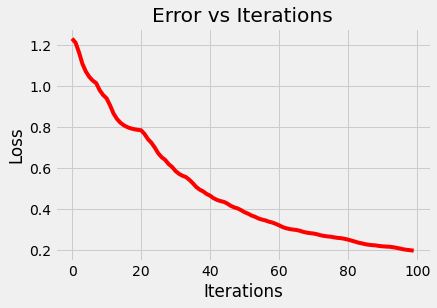

 final loss is  0.19637996172632333


In [169]:
loss = stochastic_gradient_descent_momentum(X, Y,0.1 , 0.7)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

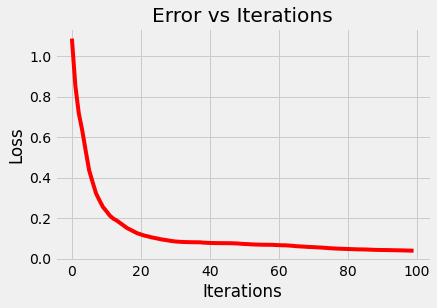

 final loss is  0.039033229632640894


In [170]:
loss = stochastic_gradient_descent_momentum(X, Y,0.5 , 0.7)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

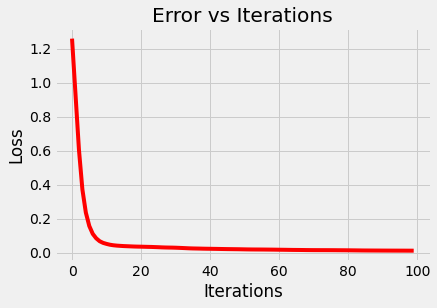

 final loss is  0.011193074651848293


In [171]:
loss = stochastic_gradient_descent_momentum(X, Y,1 , 0.7)
plotChart(100, loss)
print(' final loss is ' ,loss[-1])

# **GD + Nesterov Momentum**

In [179]:
def gradient_descent_nesterov(x, y,lerning_rate, beta):
    w = [0.1, 0.2]
    b = 0.0
    Loss = []
    vw = 0.0
    vb = 0.0
    
    for i in range(100):
        # reset gradient for each epoch
        w_derivative, b_derivative = 0,0
        for j in range(x.shape[0]):
            w_derivative, b_derivative = calc_gradient(x[j], y[j], w, b)
            previous_vw = vw
            previous_vb = vb

            vw = (beta * vw) - (lerning_rate * w_derivative)
            vb = (beta * vb) - (lerning_rate * b_derivative)
            w = [x + y for x, y in zip(w, ((-1 * beta) * previous_vw) + ((1 + beta) * vw))]
            b = b + ((-1 * beta) * previous_vb) + ((1 + beta) * vb)
            # reset gradient for each sample
            w_derivative, b_derivative = 0,0
        Loss.append(cross_entropy(x, y, w, b))
         
    return Loss

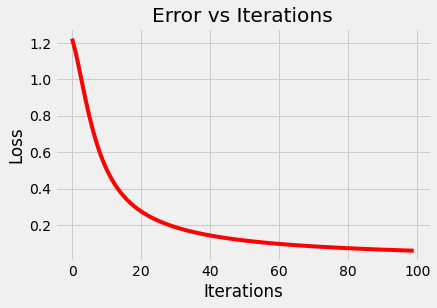

 final loss is  0.05870128762836307


In [180]:
loss = gradient_descent_nesterov(X, Y, 0.01 , 0.9)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

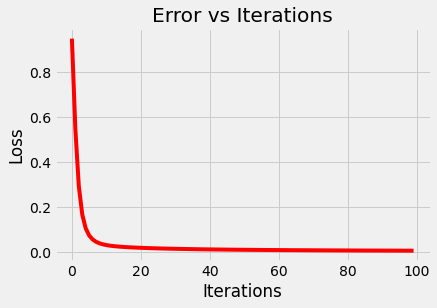

 final loss is  0.005141643722731921


In [182]:
loss = gradient_descent_nesterov(X, Y, 0.1 , 0.9)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

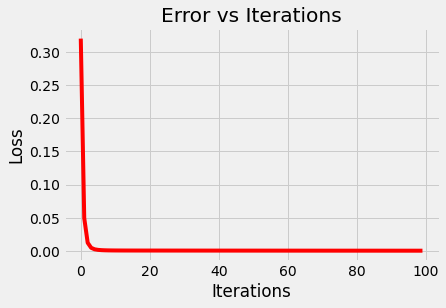

 final loss is  0.00047597139054729405


In [183]:
loss = gradient_descent_nesterov(X, Y, 0.5 , 0.9)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

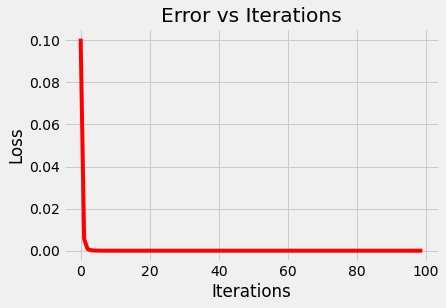

 final loss is  2.12024405654143e-05


In [184]:
loss = gradient_descent_nesterov(X, Y, 1 , 0.9)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

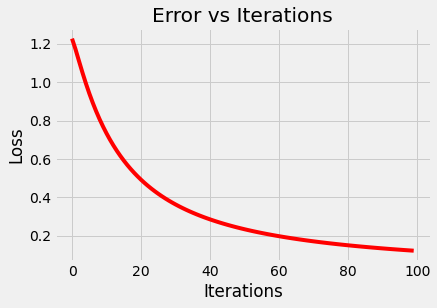

 final loss is  0.12174482151134136


In [185]:
loss = gradient_descent_nesterov(X, Y, 0.01 , 0.8)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

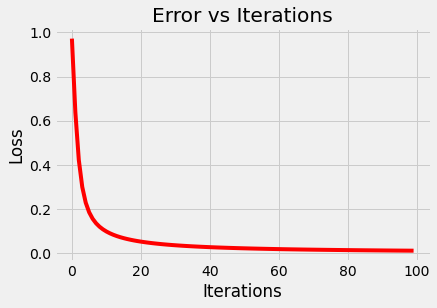

 final loss is  0.011500744822759132


In [186]:
loss = gradient_descent_nesterov(X, Y, 0.1 , 0.8)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

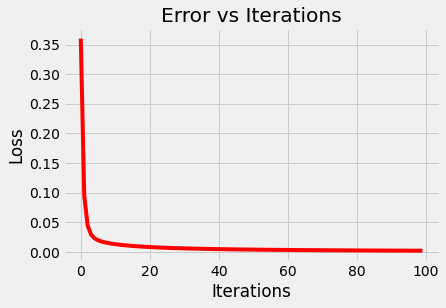

 final loss is  0.0021767224300314764


In [187]:
loss = gradient_descent_nesterov(X, Y, 0.5 , 0.8)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

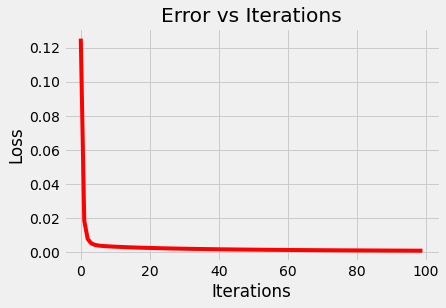

 final loss is  0.000941812924307365


In [188]:
loss = gradient_descent_nesterov(X, Y, 1 , 0.8)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

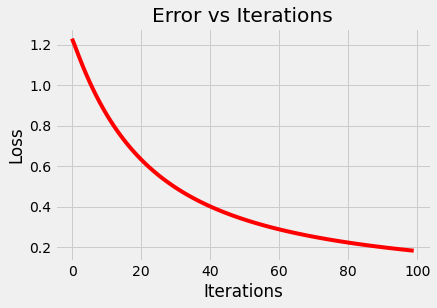

 final loss is  0.18208671442451502


In [189]:
loss = gradient_descent_nesterov(X, Y, 0.01 , 0.7)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

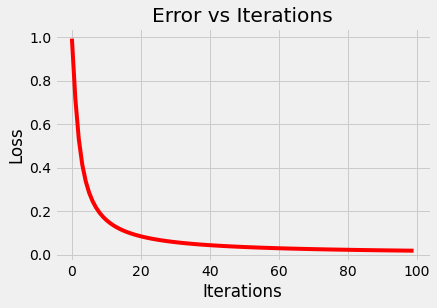

 final loss is  0.0176394183685926


In [190]:
loss = gradient_descent_nesterov(X, Y, 0.1 , 0.7)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

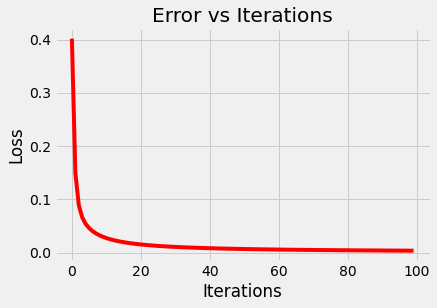

 final loss is  0.0034328081971399665


In [191]:
loss = gradient_descent_nesterov(X, Y, 0.5 , 0.7)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

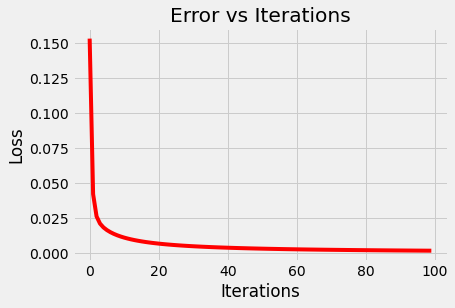

 final loss is  0.0016753386285463412


In [192]:
loss = gradient_descent_nesterov(X, Y, 1 , 0.7)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

# **SGD Nesterov Momentum**

In [193]:
def stochastic_gradient_descent_nestrov(x, y, lerning_rate,beta):
    w = [0.1, 0.2]
    b = 0.0
    Loss = []
    vw = 0.0
    vb = 0.0
    
    for i in range(100):
        # reset gradient for each epoch
        w_derivative, b_derivative = 0,0
        for i2 in range(1):
            #pick random
            shuf = np.random.randint(0,x.shape[0])
            w_derivative, b_derivative = calc_gradient(x[shuf], y[shuf], w, b)
            previous_vw = vw
            previous_vb = vb
            vw = (beta * vw) - (lerning_rate * w_derivative)
            vb = (beta * vb) - (lerning_rate * b_derivative)
            w = [x + y for x, y in zip(w, ((-1 * beta) * previous_vw) + ((1 + beta) * vw))]
            b = b + ((-1 * beta) * previous_vb) + ((1 + beta) * vb)
        Loss.append(cross_entropy(x, y, w, b))
    return Loss

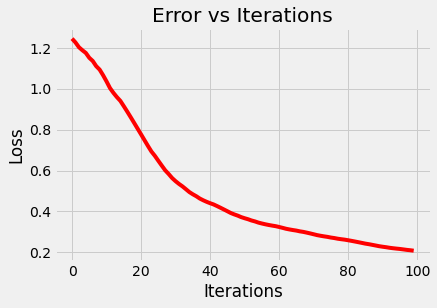

0.20758160331159856


In [195]:
loss = stochastic_gradient_descent_nestrov(X, Y,  0.01 , 0.9)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

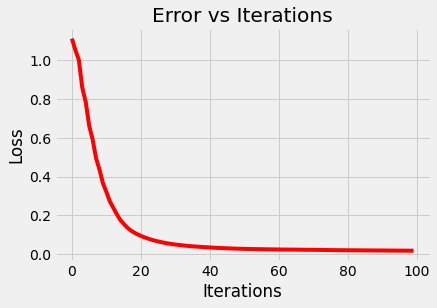

 final loss is  0.018205183350959126


In [196]:
loss = stochastic_gradient_descent_nestrov(X, Y,  0.1 , 0.9)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

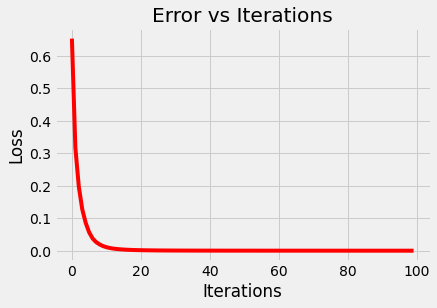

 final loss is  0.0009282567094260523


In [197]:
loss = stochastic_gradient_descent_nestrov(X, Y,  0.5 , 0.9)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

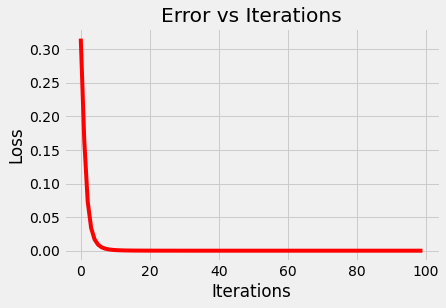

 final loss is  3.876794545150616e-05


In [198]:
loss = stochastic_gradient_descent_nestrov(X, Y,  1 , 0.9)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

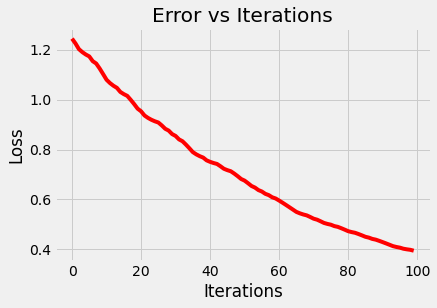

 final loss is  0.39432446785101194


In [199]:
loss = stochastic_gradient_descent_nestrov(X, Y,  0.01 , 0.8)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

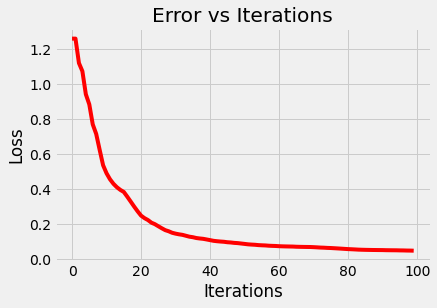

 final loss is  0.04792283781642523


In [200]:
loss = stochastic_gradient_descent_nestrov(X, Y,  0.1 , 0.8)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

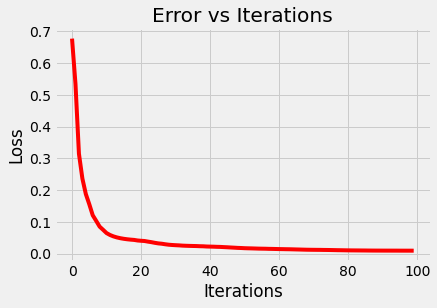

 final loss is  0.009120404667515698


In [201]:
loss = stochastic_gradient_descent_nestrov(X, Y,  0.5 , 0.8)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

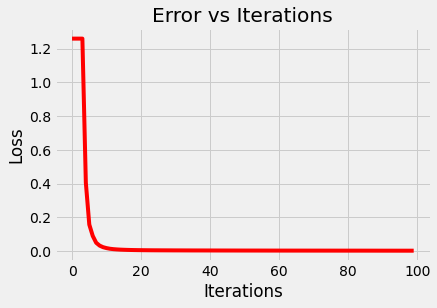

 final loss is  0.0025037741030164875


In [202]:
loss = stochastic_gradient_descent_nestrov(X, Y,  1 , 0.8)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

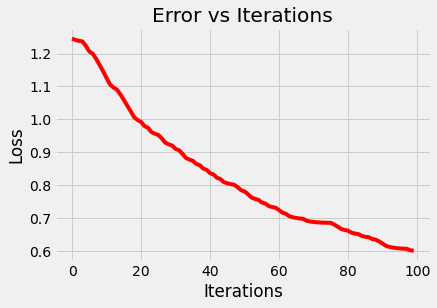

 final loss is  0.6015885013742385


In [203]:
loss = stochastic_gradient_descent_nestrov(X, Y,  0.01 , 0.7)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

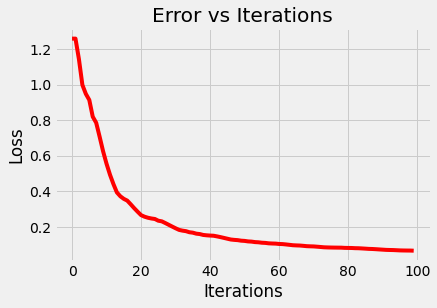

 final loss is  0.06614720323688401


In [204]:
loss = stochastic_gradient_descent_nestrov(X, Y,  0.1 , 0.7)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

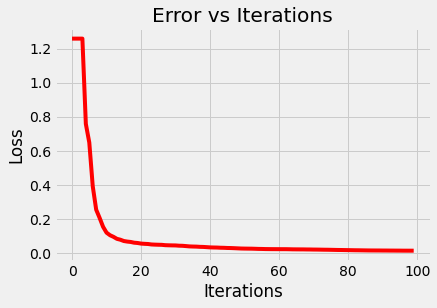

 final loss is  0.013785309228529049


In [205]:
loss = stochastic_gradient_descent_nestrov(X, Y,  0.5 , 0.7)
plotChart(100, loss)
print(' final loss is ' , loss[-1])

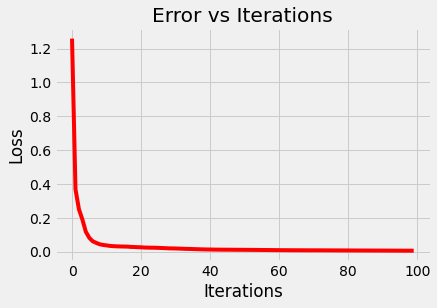

 final loss is  0.005982375650560569


In [206]:
loss = stochastic_gradient_descent_nestrov(X, Y,  1 , 0.7)
plotChart(100, loss)
print(' final loss is ' , loss[-1])